# 编码器-解码器架构
:label:`sec_encoder-decoder`

正如我们在 :numref:`sec_machine_translation`中所讨论的，
机器翻译是序列转换模型的一个核心问题，
其输入和输出都是长度可变的序列。
为了处理这种类型的输入和输出，
我们可以设计一个包含两个主要组件的架构：
第一个组件是一个*编码器*（encoder）：
它接受一个长度可变的序列作为输入，
并将其转换为具有固定形状的编码状态。
第二个组件是*解码器*（decoder）：
它将固定形状的编码状态映射到长度可变的序列。
这被称为*编码器-解码器*（encoder-decoder）架构，
如 :numref:`fig_encoder_decoder` 所示。

![编码器-解码器架构](../img/encoder-decoder.svg)
:label:`fig_encoder_decoder`

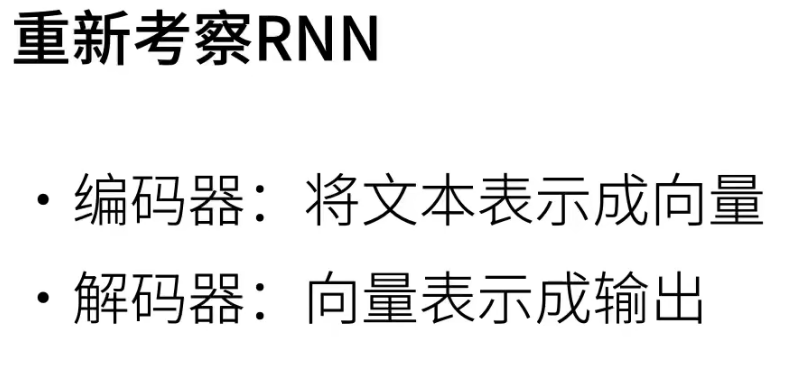
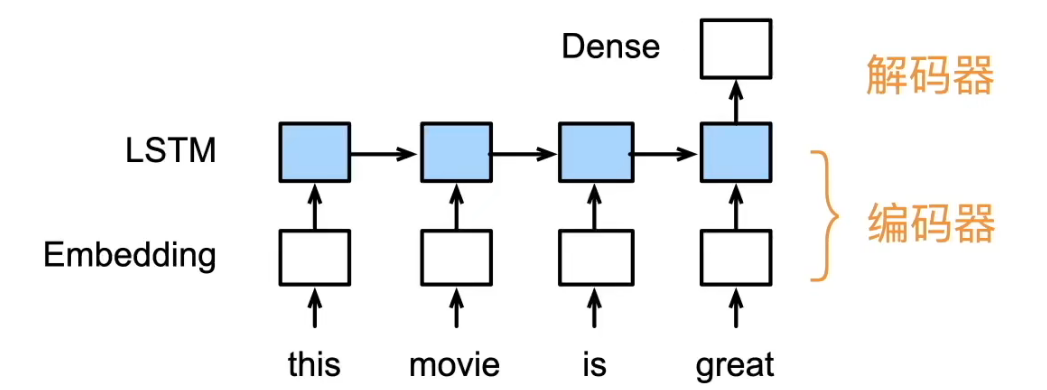
我们以英语到法语的机器翻译为例：
给定一个英文的输入序列：“They”、“are”、“watching”、“.”。
首先，这种“编码器－解码器”架构将长度可变的输入序列编码成一个“状态”，
然后对该状态进行解码，
一个词元接着一个词元地生成翻译后的序列作为输出：
“Ils”、“regordent”、“.”。
由于“编码器－解码器”架构是形成后续章节中不同序列转换模型的基础，
因此本节将把这个架构转换为接口方便后面的代码实现。

## (**编码器**)

在编码器接口中，我们只指定长度可变的序列作为编码器的输入`X`。
任何继承这个`Encoder` 基类的模型将完成代码实现。


In [1]:
from torch import nn

#基于可变参数执行
#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError
# 可以在父类中先预留一个方法接口不实现，在其子类中实现。如果要求其子类一定要实现，不实现的时候会导致问题

## [**解码器**]

在下面的解码器接口中，我们新增一个`init_state`函数，
用于将编码器的输出（`enc_outputs`）转换为编码后的状态。
注意，此步骤可能需要额外的输入，例如：输入序列的有效长度，
这在 :numref:`subsec_mt_data_loading` 中进行了解释。
为了逐个地生成长度可变的词元序列，
解码器在每个时间步都会将输入
（例如：在前一时间步生成的词元）和编码后的状态
映射成当前时间步的输出词元。


In [2]:
#@save
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

## [**合并编码器和解码器**]

总而言之，“编码器-解码器”架构包含了一个编码器和一个解码器，
并且还拥有可选的额外的参数。
在前向传播中，编码器的输出用于生成编码状态，
这个状态又被解码器作为其输入的一部分。


In [3]:
#@save
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

“编码器－解码器”体系架构中的术语“状态”
可能会启发你使用具有状态的神经网络来实现该架构。
在下一节中，我们将学习如何应用循环神经网络，
来设计基于“编码器－解码器”架构的序列转换模型。

## 小结

* “编码器－解码器”架构可以将长度可变的序列作为输入和输出，因此适用于机器翻译等序列转换问题。
* 编码器将长度可变的序列作为输入，并将其转换为具有固定形状的编码状态。
* 解码器将具有固定形状的编码状态映射为长度可变的序列。

## 练习

1. 假设我们使用神经网络来实现“编码器－解码器”架构，那么编码器和解码器必须是同一类型的神经网络吗？
1. 除了机器翻译，你能想到其它可以适用于”编码器－解码器“架构的应用吗？


1. 不必须
2. 图像生成，语义分割